In [4]:
import cv2
import numpy as np

In [5]:
img = cv2.imread('img/test.jpg')

cv2.imshow('test', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
model = cv2.dnn.readNetFromCaffe('model/deploy.prototxt.txt', 'model/res10_300x300_ssd_iter_140000.caffemodel')

In [7]:
# step 1: blod from img
blob = cv2.dnn.blobFromImage(img, 1, (300,300), (104,177,123), swapRB=True)
# step 2: set blob as input 
model.setInput(blob)
# test 3: get output 
detections = model.forward()

In [8]:
detections.shape

(1, 1, 200, 7)

shape

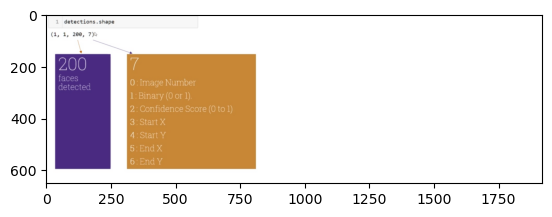

In [9]:
from matplotlib import pyplot as plt
shape = cv2.imread('img/shape.jpg')
plt.imshow(shape)
plt.show()

In [12]:
def face_detect_dnn(img):
    
    # step 1: blod from img
    blob = cv2.dnn.blobFromImage(img, 1, (300,300), (104,177,123), swapRB=True)
    # step 2: set blob as input 
    model.setInput(blob)
    # test 3: get output 
    detections = model.forward()
    # step 4: drawing bounding box on top of face detected
    img_detect = img.copy()
    h,w = img_detect.shape[:2]
    # detections.shape

    for i in range(0,detections.shape[2]):
        confidence = detections[0,0,i,2]

        if confidence > 0.5:
#             print(confidence)
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            box = box.astype('int')
            cv2.rectangle(img_detect,(box[0], box[1]),(box[2], box[3]),(0,255,0),1)

            text = 'score: {:.0f}%'.format(confidence*100)
            cv2.putText(img_detect,text,(box[0], box[1]),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        
        return img_detect

    
img = cv2.imread('img/test1.jpg')
img_detect = face_detect_dnn(img)
cv2.imshow('test', img_detect)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img = cv2.imread('img/test3.jpg')  
# step 1: blod from img
blob = cv2.dnn.blobFromImage(img, 1, (300,300), (104,177,123), swapRB=True)
# step 2: set blob as input 
model.setInput(blob)
# test 3: get output 
detections = model.forward()
# step 4: drawing bounding box on top of face detected
img_detect = img.copy()
h,w = img_detect.shape[:2]
# detections.shape

for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]

    if confidence > 0.5:
        print(confidence)
        box = detections[0,0,i,3:7]*np.array([w,h,w,h])
        box = box.astype('int')
        cv2.rectangle(img_detect,(box[0], box[1]),(box[2], box[3]),(0,255,0),1)

        text = 'score: {:.0f}%'.format(confidence*100)
        cv2.putText(img_detect,text,(box[0], box[1]),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        

cv2.imshow('test', img_detect)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.90031254
0.8191726
0.7320795


In [14]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
    
    img_dect = face_detect_dnn(frame)
    
    cv2.imshow('realtime', img_dect)
    
    if cv2.waitKey(1) == 27: #enter esc to exit
        break

cap.release()
cv2.destroyAllWindows()